# IMPORTING VARIOUS LIBRARIES TF-IDF

In [1]:
import numpy as np 
import pandas as pd 
import re  
import nltk  
from nltk.corpus import stopwords 
import matplotlib.pyplot as plt



# LOADING DATASET

In [2]:
tweets = pd.read_csv("dataset2.csv")

tweets.head()

,Datetime,user_name,user_location,user_description,tweet,sentiment
0,2020-03-25 06:36:25+00:00,TickWatcher,"California, USA","Update for stock earnings, dividend, money flo...","$DG #Dollar General #Options #maxpain Chart, O...",Positive
1,2020-03-25 06:18:32+00:00,Vista Partners LLC,"San Francisco, CA","CA Registered Investment Advisor, Publishes FR...",“Education is not only a ladder of opportunity...,Neutral
2,2020-03-25 06:05:46+00:00,Capt. Investo,"St Petersburg, FL",“The quickest way to double your money is to f...,$GCLT news coming soon #fintech #finance https...,Neutral
3,2020-03-25 06:35:29+00:00,FFL Tribe,"Austin, TX",The Tribe - Family First Life agents on a miss...,That amazing feeling when you finally close a ...,Positive
4,2020-03-25 06:15:49+00:00,inter_mkt,France,cbpassiveincomes #trading #forex #bitcoin #tra...,From OHM to SHIB: 5 Most Impressive Altcoins o...,Positive


# CHECKING THE SHAPE OF TWEET AND REMOVING NAN VALUE

In [3]:
tweets.dropna(inplace = True)
tweets.shape

(12524, 6)

In [4]:
%matplotlib inline


In [5]:
tweets.head()

,Datetime,user_name,user_location,user_description,tweet,sentiment
0,2020-03-25 06:36:25+00:00,TickWatcher,"California, USA","Update for stock earnings, dividend, money flo...","$DG #Dollar General #Options #maxpain Chart, O...",Positive
1,2020-03-25 06:18:32+00:00,Vista Partners LLC,"San Francisco, CA","CA Registered Investment Advisor, Publishes FR...",“Education is not only a ladder of opportunity...,Neutral
2,2020-03-25 06:05:46+00:00,Capt. Investo,"St Petersburg, FL",“The quickest way to double your money is to f...,$GCLT news coming soon #fintech #finance https...,Neutral
3,2020-03-25 06:35:29+00:00,FFL Tribe,"Austin, TX",The Tribe - Family First Life agents on a miss...,That amazing feeling when you finally close a ...,Positive
4,2020-03-25 06:15:49+00:00,inter_mkt,France,cbpassiveincomes #trading #forex #bitcoin #tra...,From OHM to SHIB: 5 Most Impressive Altcoins o...,Positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

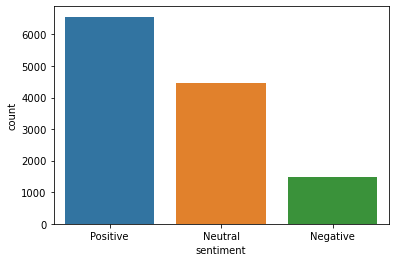

In [6]:
import seaborn as sns
sns.countplot(x='sentiment', data=tweets)


# DATA PROCESSING

In [7]:
X = tweets.iloc[:, 4].values  
y = tweets.iloc[:, 5].values


In [8]:
processed_tweets = []

for tweet in range(0, len(X)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))

    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)

    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 

    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)

    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()

    processed_tweets.append(processed_tweet)


# BAG OF WORDS AND TF-IDF Scheme for Text to Numeric Feature Generation

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=600, min_df=3, max_df=0.5, stop_words=stopwords.words('english'))
X = np.nan_to_num(X)
X = tfidfconverter.fit_transform(processed_tweets).toarray()



# DIVIDING DATA INTO TRAINING AND TESTING

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Training and Evaluating the Text Classification Model

In [11]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [12]:
predictions = text_classifier.predict(X_test)


In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('\n Accuracy', accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  



 Accuracy 0.7772455089820359
[[ 100   88   91]
 [  13  755  158]
 [  11  197 1092]]
              precision    recall  f1-score   support

    Negative       0.81      0.36      0.50       279
     Neutral       0.73      0.82      0.77       926
    Positive       0.81      0.84      0.83      1300

    accuracy                           0.78      2505
   macro avg       0.78      0.67      0.70      2505
weighted avg       0.78      0.78      0.77      2505

